# Business Understanding
Boeren krijgen alleen betaald voor het vet wat in de melk zit, daarvan kun je kaas maken. Om boeren dus eerlijk te compenseren is het van belang om snel en accuraat de hoeveelheid vet in een lading melk te meten. De standaard manier om dit te doen is via een chemische meting, dit is alleen vrij traag en erg duur. Een alternatieve aanpak is het gebruik van infraroodspectroscopie. 

Het idee is om infraroodlicht door een dun laagje melk te stralen. Bepaalde chemische componenten in de melk absorberen licht op bepaalde golflengtes. Hoe meer van de chemische component aanwezig is, hoe sterker de absorptie. Elk melk sample heeft dus een uniek absorptiespectrum. De uitdaging voor jullie is om een statistisch model te maken wat chemische referentie metingen van vet koppelt aan de gemeten absorptiespectra. 

Als dit statistisch model gemaakt is hoeven we van een nieuw melksample alleen het spectrum te meten om een schatting van de hoeveelheid vet te krijgen. Dit is veel sneller en orde grootte goedkoper. 

# Data Understanding
De aangeleverde data bevat 48 melksample metingen in de vorm van `.spc` files. Daarnaast is er een Excel bevat beschikbaar met alle waardes voor vet, proteïne en lactose.

gx-y(3)


397.306909    0.102523
401.164258    1.008154
405.021606    1.008154
408.878955    1.008154
412.736304    0.108095
dtype: float64

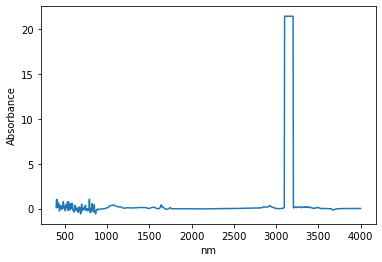

In [46]:
from pyspectra.readers.read_spc import read_spc

spc = read_spc('Spectra\Sample 1.spc')
plt.xlabel("nm")
plt.ylabel("Absorbance")
spc.plot()
spc.head()

Belangrijke gebieden om in de gaten te houden zijn: 
- Fingerprint: 1000 t/m 1585 nm
- C=O - 1700nm
- CH2 (vet) - 2800 t/m 3000 nm

Als we kijken naar deze gebieden krijgen we:
#### Fingerprint

<AxesSubplot:>

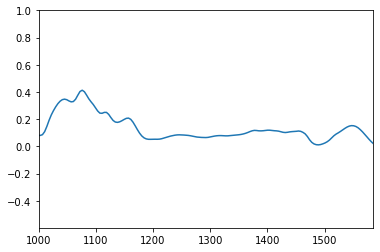

In [50]:
plt.xlim([1000, 1585])
plt.ylim([spc.min(), 1])
spc.plot()

#### C=O

<AxesSubplot:>

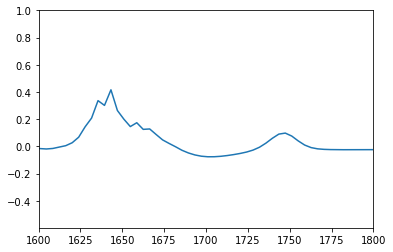

In [51]:
plt.xlim([1600, 1800])
plt.ylim([spc.min(), 1])
spc.plot()

#### CH2 (Vet)

<AxesSubplot:>

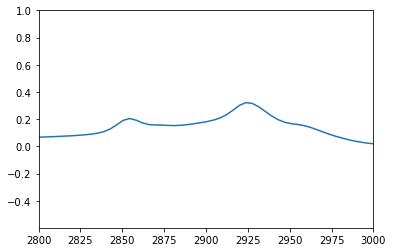

In [53]:
plt.xlim([2800, 3000])
plt.ylim([spc.min(), 1])
spc.plot()

Hieronder vind je dezelfde belangrijke reflectie gebieden, nu alleen vergeleken met alle 48 samples die er zijn.

In [71]:
from pyspectra.readers.read_spc import read_spc_dir

df_spc, dict_spc = read_spc_dir('Spectra')
display(df_spc.transpose())
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlabel("nm")
plt.ylabel("Absorbance")
plt.xlim([1000, 3000])
plt.ylim([-0.5, 0.8])
plt.show()

gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)
gx-y(3)


,Sample 1.spc,Sample 10.spc,Sample 11.spc,Sample 12.spc,Sample 13.spc,Sample 14.spc,Sample 15.spc,Sample 16.spc,Sample 17.spc,Sample 18.spc,...,Sample 44.spc,Sample 45.spc,Sample 46.spc,Sample 47.spc,Sample 48.spc,Sample 5.spc,Sample 6.spc,Sample 7.spc,Sample 8.spc,Sample 9.spc
397.306909,0.102523,-0.079924,-0.323271,-0.136930,0.125331,0.279098,0.292851,0.691449,0.399158,0.426710,...,-0.152890,0.289391,-0.323950,-0.080623,-0.069079,-0.132207,-0.220950,-0.274788,0.225479,-0.180702
401.164258,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
405.021606,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
408.878955,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,...,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154,1.008154
412.736304,0.108095,0.005067,-0.067009,-0.138287,0.475342,0.201846,0.888871,0.168038,0.362750,0.030872,...,-0.032641,0.120329,-0.411707,-0.113812,0.222036,0.531072,0.043406,0.346499,-0.235037,0.069180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984.641138,0.008057,0.016062,0.011350,0.014953,0.006575,0.009834,0.013924,0.015664,0.032445,0.032223,...,0.017721,0.013247,0.009502,0.017391,0.008885,0.011976,0.008789,0.010493,0.007317,0.012368
3988.498486,0.007464,0.015982,0.010947,0.014692,0.006088,0.009457,0.013758,0.015197,0.032323,0.032134,...,0.017608,0.012797,0.009161,0.017366,0.008486,0.011802,0.008386,0.010298,0.006770,0.012298
3992.355835,0.006890,0.015956,0.010624,0.014525,0.005640,0.009150,0.013683,0.014791,0.032285,0.032120,...,0.017565,0.012406,0.008886,0.017393,0.008138,0.011695,0.008029,0.010166,0.006263,0.012278
3996.213184,0.006382,0.016003,0.010413,0.014455,0.005292,0.008939,0.013673,0.014477,0.032303,0.032177,...,0.017603,0.012110,0.008693,0.017478,0.007891,0.011686,0.007779,0.010135,0.005838,0.012330


(-0.1, 0.5)

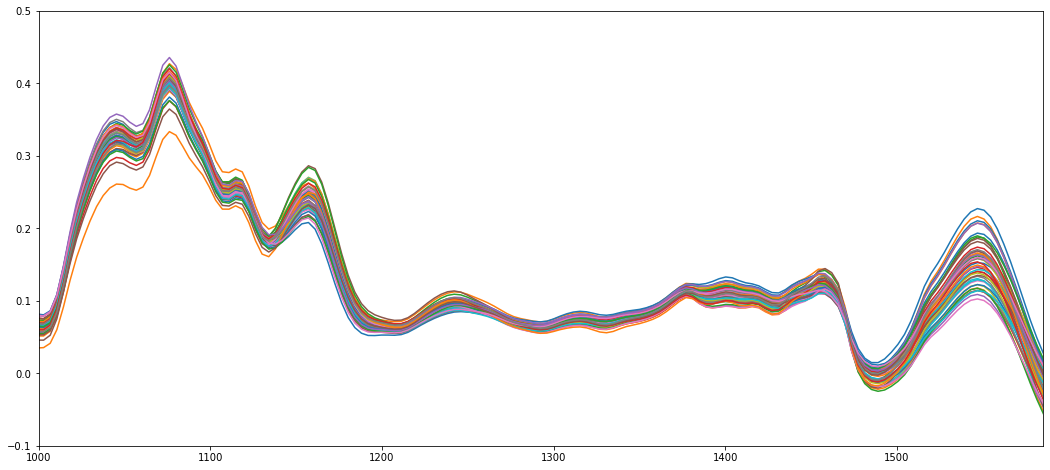

In [91]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([1000, 1585])
plt.ylim([-0.1, 0.5])

(-0.3, 0.5)

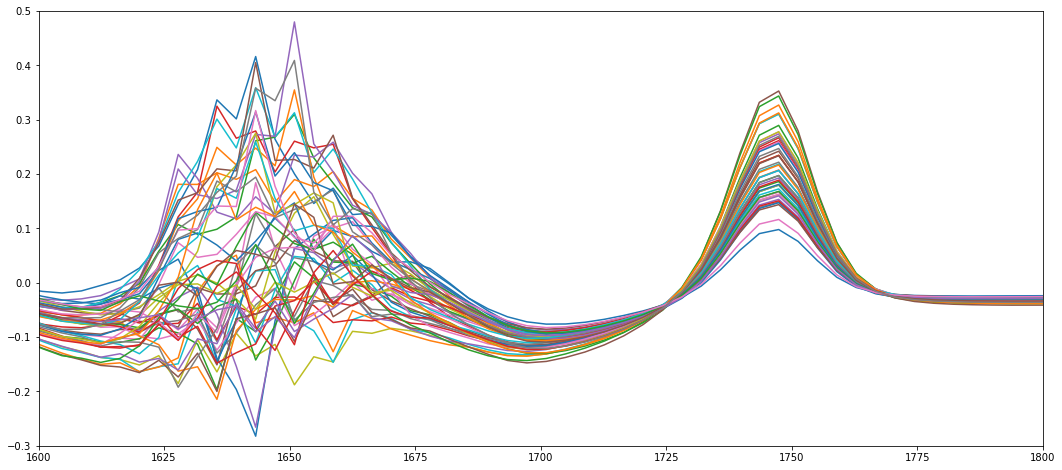

In [92]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([1600, 1800])
plt.ylim([-0.3, 0.5])

(-0.1, 0.8)

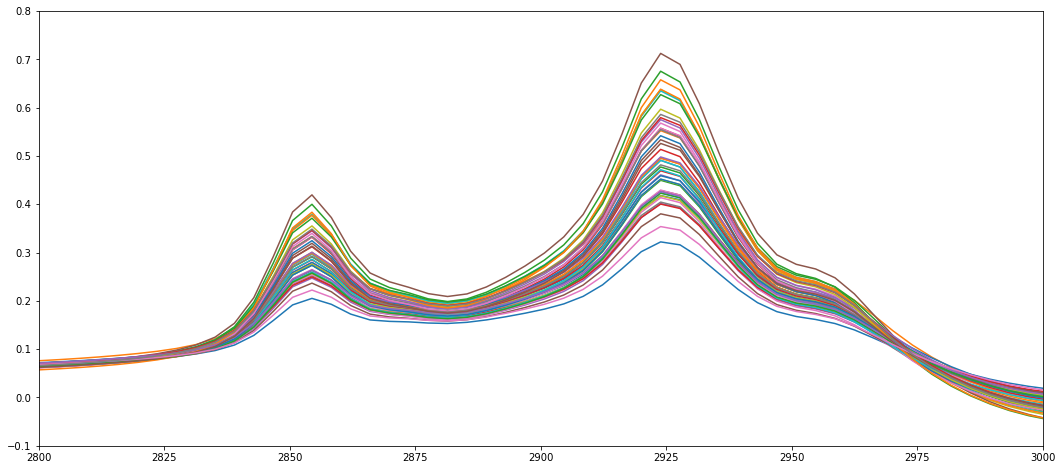

In [93]:
f, ax = plt.subplots(1, figsize=(18,8))
ax.plot(df_spc.transpose())
plt.xlim([2800, 3000])
plt.ylim([-0.1, 0.8])